# News Classifier using Bidirectional LSTM
Dataset used: uci-news-aggregator.csv
https://www.kaggle.com/datasets/uciml/news-aggregator-dataset

In [ ]:
import pandas as pd

## Load dataset from Google Drive and perform EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Used the UCI News aggregator dataset from Kaggle to create BiLSTM based supervised machine learning model to create a news classifier. The dataset has 422,937 news stories collected by a web aggregator between March 10th, 2014 and August 10th, 2014.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/newsaggr/uci-news-aggregator.csv")

In [ ]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [ ]:
###Drop Nan Values
df=df.dropna()

Records with NA values were dropped. The dataset has lebeled data, the label being the 'Category' field having one of the four values 'b', 'e', 'm' and 't' standing for 'business', 'entertainment', 'medical' and 'technology' respectively. The main independent variable of interest is the 'Title' field which contains a brief descriprion of the news story.

In [ ]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422417 entries, 0 to 422418
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         422417 non-null  int64 
 1   TITLE      422417 non-null  object
 2   URL        422417 non-null  object
 3   PUBLISHER  422417 non-null  object
 4   CATEGORY   422417 non-null  object
 5   STORY      422417 non-null  object
 6   HOSTNAME   422417 non-null  object
 7   TIMESTAMP  422417 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 29.0+ MB


In [ ]:
#Add a 'length' column having a length of the 'TITLE' column

df['LENGTH'] = df['TITLE'].apply(lambda x: len(x.split()))
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,LENGTH
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,12
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,12
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550,11
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,9
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,8


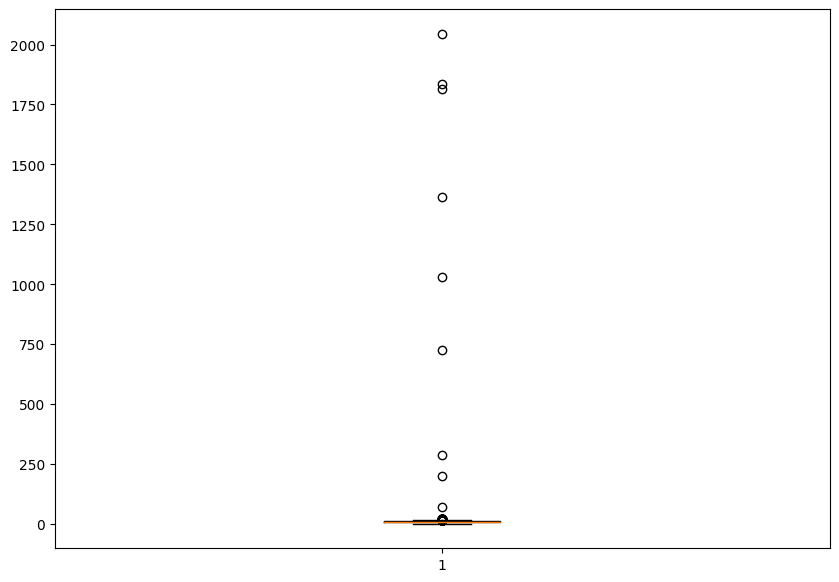

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(df['LENGTH'])

# show plot
plt.show()

In [ ]:
df.describe()

,ID,TIMESTAMP,LENGTH
count,422417.000000,4.224170e+05,422417.000000
mean,211537.721735,1.400445e+12,9.257426
std,122102.335976,3.733077e+09,6.431422
min,1.000000,1.394470e+12,1.000000
25%,105803.000000,1.397349e+12,7.000000
50%,211656.000000,1.399990e+12,9.000000
75%,317274.000000,1.403775e+12,11.000000
max,422937.000000,1.409229e+12,2045.000000


As part of our preprocessing, we determined the length of the 'Title field' and dropped stories with titles shorter than 30 characters considering  insignificant for tranining our model. After dropping these records we were left with 401983 records.

---



In [ ]:
#Drop articles with less than 5 words title

df = df[df['TITLE'].apply(lambda x: len(x.split())>5)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388359 entries, 0 to 422418
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         388359 non-null  int64 
 1   TITLE      388359 non-null  object
 2   URL        388359 non-null  object
 3   PUBLISHER  388359 non-null  object
 4   CATEGORY   388359 non-null  object
 5   STORY      388359 non-null  object
 6   HOSTNAME   388359 non-null  object
 7   TIMESTAMP  388359 non-null  int64 
 8   LENGTH     388359 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 29.6+ MB


In [ ]:
#Display PUBLISHERS
df['PUBLISHER'].value_counts().head(10)

Reuters              3872
Businessweek         2372
Huffington Post      2338
Contactmusic.com     2319
Daily Mail           2236
Examiner.com         2037
NASDAQ               2009
Los Angeles Times    1934
GlobalPost           1909
RTT News             1702
Name: PUBLISHER, dtype: int64

In [ ]:
df.PUBLISHER.nunique()

10370

In [ ]:
target_category = df['CATEGORY'].unique()
print(target_category)

['b' 't' 'e' 'm']


In [ ]:
df.sort_values('TITLE',inplace=True, ascending=False)
duplicated_articles_series = df.duplicated('TITLE', keep = False)
df = df[~duplicated_articles_series]
print("Total number of articles after removing duplicates:", df.shape[0])

Total number of articles after removing duplicates: 363478


## One-hot Encode Categorical field
The categorical values of the 'Category' field were one-hot encoded using pandas 'get_dummies' function.

In [ ]:
df = pd.get_dummies(df, columns = ['CATEGORY'])
df.head()

,ID,TITLE,URL,PUBLISHER,STORY,HOSTNAME,TIMESTAMP,LENGTH,CATEGORY_b,CATEGORY_e,CATEGORY_m,CATEGORY_t
392742,393261,﻿Zillow Buys Trulia For $3.5B In Stock,http://www.bankerandtradesman.com/news160497.html,Banker \& Tradesman,dPKRgNyZOhJf-yMvwaXUfYnxIMacM,www.bankerandtradesman.com,1406627853882,7,1,0,0,0
350354,350814,﻿Facebook buys video ad technology firm,http://www.worldbulletin.net/news/139983/faceb...,www.worldbulletin.net,dBF0rnY321dV3YMFbOIwbnwCdct1M,www.worldbulletin.net,1404391898096,6,0,0,0,1
358809,359269,﻿Decline in trials for Alzheimer's disease,http://www.worldbulletin.net/news/140065/decli...,www.worldbulletin.net,dIkIKzoagMyadiMwgYAnhX2B_PQHM,www.worldbulletin.net,1404537711226,6,0,0,1,0
358946,359406,﻿Deadly anthrax disease 'discovered in Hungari...,http://www.worldbulletin.net/news/140066/deadl...,www.worldbulletin.net,dT8quP5GDu73LSMjgaws1_Za_8KEM,www.worldbulletin.net,1404538588316,7,0,0,1,0
219577,220023,﻿36.1M to travel Memorial Day weekend; gas pri...,http://www.knoxnews.com/news/2014/may/19/361m-...,Knoxville News Sentinel,dK8pXk4D1d7OLnMuDev0sk_uTlnYM,www.knoxnews.com,1400513242578,9,1,0,0,0


The independent and dependent features were split into X and y files respectively.

In [ ]:
## Get the Independent Features
X=df.drop(['URL','CATEGORY_b','CATEGORY_e','CATEGORY_m','CATEGORY_t'],axis=1)
X.head()

,ID,TITLE,PUBLISHER,STORY,HOSTNAME,TIMESTAMP,LENGTH
392742,393261,﻿Zillow Buys Trulia For $3.5B In Stock,Banker \& Tradesman,dPKRgNyZOhJf-yMvwaXUfYnxIMacM,www.bankerandtradesman.com,1406627853882,7
350354,350814,﻿Facebook buys video ad technology firm,www.worldbulletin.net,dBF0rnY321dV3YMFbOIwbnwCdct1M,www.worldbulletin.net,1404391898096,6
358809,359269,﻿Decline in trials for Alzheimer's disease,www.worldbulletin.net,dIkIKzoagMyadiMwgYAnhX2B_PQHM,www.worldbulletin.net,1404537711226,6
358946,359406,﻿Deadly anthrax disease 'discovered in Hungari...,www.worldbulletin.net,dT8quP5GDu73LSMjgaws1_Za_8KEM,www.worldbulletin.net,1404538588316,7
219577,220023,﻿36.1M to travel Memorial Day weekend; gas pri...,Knoxville News Sentinel,dK8pXk4D1d7OLnMuDev0sk_uTlnYM,www.knoxnews.com,1400513242578,9


In [ ]:
## Get the Dependent features
y=df[['CATEGORY_b','CATEGORY_e','CATEGORY_m','CATEGORY_t']]

In [ ]:
y.value_counts()

CATEGORY_b  CATEGORY_e  CATEGORY_m  CATEGORY_t
0           1           0           0             132712
1           0           0           0              98982
0           0           0           1              93521
                        1           0              38263
dtype: int64

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363478 entries, 392742 to 345809
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   CATEGORY_b  363478 non-null  uint8
 1   CATEGORY_e  363478 non-null  uint8
 2   CATEGORY_m  363478 non-null  uint8
 3   CATEGORY_t  363478 non-null  uint8
dtypes: uint8(4)
memory usage: 4.2 MB


In [ ]:
y.shape

(363478, 4)

In [ ]:
X.shape

(363478, 7)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.13.0'

## Create Word Embeddings

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

A vocabulary size of 8000 was defined for word embeddings.

In [ ]:
### Vocabulary size
voc_size=8000

In [ ]:
messages=X.copy()

In [ ]:
messages['TITLE'][1]

"Fed's Charles Plosser sees high bar for change in pace of tapering"

In [ ]:
messages.reset_index(inplace=True)

Used nltk's 'WordNetLemmatizer' function to lemmatize the word embeddings, dropping english stopwords as per the nltk's stopword repository for English language. The lemmatizer was used to create a word corpus that is used by our machine learning model..  

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    if (i%1000==0):
      print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['TITLE'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [ ]:
corpus

['zillow buy trulia b stock',
 'facebook buy video ad technolog firm',
 'declin trial alzheim diseas',
 'deadli anthrax diseas discov hungarian beef',
 'travel memori day weekend ga price steadi',
 'garth brook fiasco hurt reput taoiseach',
 'paid domino pizza custom data',
 'bn wipe valu candi crush compani',
 'pm let twitter govt',
 'judg judi justin bieber make fool',
 'got fashion shirt american apparel termin ceo',
 'storm allow percent alloc state water project user',
 'procedur girl attack raccoon',
 'first confirm case chikungunya state view',
 'zero motiv dark comedi win best narr featur tribeca fest',
 'zero dark thirti filmmak eye bow bergdahl stori',
 'mileag may vari ford effici vehicl',
 'young blood revers age old mice',
 'act like covert pedophil jada pinkett smith check paparazzi',
 'need shut black babi kim kardashian talk racial attack',
 'ye big ego',
 'year luigi gener million loss nintendo',
 'yolo motherf ker drake chri brown blake griffin team',
 'xlte deliv ad 

The words in the corpus were numerically encoded using 'one_hot' function with values ranging from 0 to the vocabulary size.

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[4466, 4784, 3601, 1750, 3048],
 [6095, 4784, 4424, 5485, 2011, 7851],
 [1708, 4222, 4868, 386],
 [7032, 2225, 386, 4736, 6865, 6074],
 [1508, 7666, 2948, 3465, 1908, 4027, 3800],
 [7761, 2684, 6483, 1739, 3937, 13],
 [5162, 6060, 7190, 4807, 1083],
 [3364, 5095, 4400, 7799, 4716, 3077],
 [4791, 5790, 6605, 1574],
 [4588, 1112, 7896, 6593, 7276, 6216],
 [6045, 6275, 319, 3253, 5517, 3916, 5132],
 [3347, 3871, 4922, 5406, 5659, 5412, 2096, 4718],
 [3291, 1713, 3694, 381],
 [3022, 5625, 6746, 2613, 5659, 4609],
 [509, 2196, 4054, 980, 1434, 3535, 3879, 3112, 2989, 436],
 [509, 4054, 4459, 3308, 7655, 693, 6506, 7972],
 [4251, 1899, 3327, 7649, 1764, 6077],
 [3336, 4788, 2308, 2600, 3076, 7843],
 [6455, 6276, 4856, 2599, 2348, 1030, 621, 7096, 6027],
 [7533, 1175, 6196, 7785, 2064, 6099, 5579, 2097, 3694],
 [4470, 4715, 2998],
 [2292, 894, 5005, 5507, 6741, 4676],
 [4695, 505, 5670, 3602, 155, 2006, 4168, 906, 7160],
 [955, 3937, 5485, 3386, 5746, 3935, 2751, 4374, 5262],
 [5583, 3758, 7

The encoded values were embedded speciying the sentence length as 30 words and padding 0s to make the sentence lenght as 30 for all sentences.

In [ ]:
sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3601 1750 3048]
 [   0    0    0 ... 5485 2011 7851]
 [   0    0    0 ... 4222 4868  386]
 ...
 [   0    0    0 ... 5760 7719 7753]
 [   0    0    0 ... 4791 5427 3076]
 [   0    0    0 ...  120  128 7104]]


In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 4466, 4784, 3601, 1750, 3048], dtype=int32)

In [ ]:
"""
from keras.layers import Layer
import keras.backend as K
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()
        """

'\nfrom keras.layers import Layer\nimport keras.backend as K\nclass attention(Layer):\n    def __init__(self,**kwargs):\n        super(attention,self).__init__(**kwargs)\n\n    def build(self,input_shape):\n        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")\n        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")\n        super(attention, self).build(input_shape)\n\n    def call(self,x):\n        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)\n        at=K.softmax(et)\n        at=K.expand_dims(at,axis=-1)\n        output=x*at\n        return K.sum(output,axis=1)\n\n    def compute_output_shape(self,input_shape):\n        return (input_shape[0],input_shape[-1])\n\n    def get_config(self):\n        return super(attention,self).get_config()\n        '

## Define and Train a Bidirectional LSTM (Long Short Term Memory) Model

The Bidirectional LSTM model was defined using TensorFlow seqential layers. The layers used are respectively the embedding layer, BiLSTM layer with 160 nodes, dropout layer with a dropout ratio of 0.5, a BatchNormalization layer and a dense activation layer with 'softmax' activation. The model was compiled with a 'bianry_crossentropy' loss function, 'adam' optimizer and metrics as 'accuracy'. The compiled model had 579024 trainable parameters.

In [ ]:
## Creating Bi-LSTM model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(160)))
#model.add(attention())
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(4,activation='softmax'))
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 40)            320000    
                                                                 
 bidirectional (Bidirection  (None, 320)               257280    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 320)               0         
                                                                 
 batch_normalization (Batch  (None, 320)               1280      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 4)                 1284      
                                                                 
Total params: 579844 (2.21 MB)
Trainable params: 579204 

In [ ]:
len(embedded_docs),y.shape

(363478, (363478, 4))

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final

array([[   0,    0,    0, ..., 3601, 1750, 3048],
       [   0,    0,    0, ..., 5485, 2011, 7851],
       [   0,    0,    0, ..., 4222, 4868,  386],
       ...,
       [   0,    0,    0, ..., 5760, 7719, 7753],
       [   0,    0,    0, ..., 4791, 5427, 3076],
       [   0,    0,    0, ...,  120,  128, 7104]], dtype=int32)

In [ ]:
y_final

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [ ]:
X_final.shape,y_final.shape

((363478, 30), (363478, 4))

The data was split into train and test using sklearn's 'train_test_split' function and then trained using the 'fit' function over 10 epochs with a bacthsize of 64.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=42)

In [ ]:
### Train Bi-LSTM
trace = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=15)

Epoch 1/15
4544/4544 [==============================] - 406s 89ms/step - loss: 0.3253 - accuracy: 0.8865 - val_loss: 0.2543 - val_accuracy: 0.9133
Epoch 2/15
4544/4544 [==============================] - 402s 88ms/step - loss: 0.2482 - accuracy: 0.9159 - val_loss: 0.2408 - val_accuracy: 0.9171
Epoch 3/15
4544/4544 [==============================] - 402s 88ms/step - loss: 0.2270 - accuracy: 0.9236 - val_loss: 0.2244 - val_accuracy: 0.9226
Epoch 4/15
4544/4544 [==============================] - 400s 88ms/step - loss: 0.2136 - accuracy: 0.9287 - val_loss: 0.2274 - val_accuracy: 0.9240
Epoch 5/15
4544/4544 [==============================] - 400s 88ms/step - loss: 0.2023 - accuracy: 0.9328 - val_loss: 0.2174 - val_accuracy: 0.9260
Epoch 6/15
4544/4544 [==============================] - 400s 88ms/step - loss: 0.1925 - accuracy: 0.9366 - val_loss: 0.2256 - val_accuracy: 0.9226
Epoch 7/15
4544/4544 [==============================] - 400s 88ms/step - loss: 0.1860 - accuracy: 0.9387 - val_loss: 0

In [ ]:
#loaded_model.load_weights("model.h5")

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy: {:.2f} %'.format(test_acc*100))

2272/2272 [==============================] - 37s 16ms/step - loss: 0.2163 - accuracy: 0.9312
Test accuracy: 93.12 %


## Analyze Model Performance

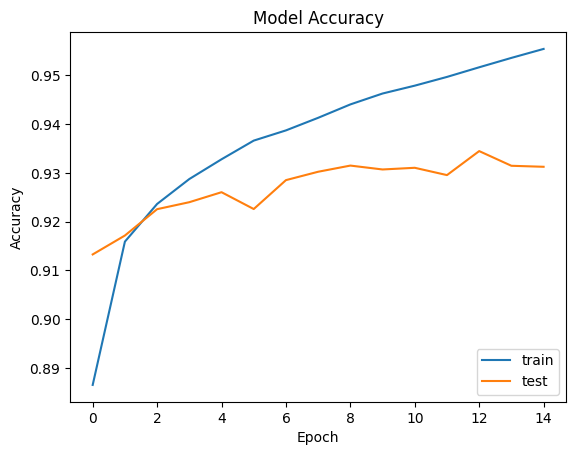

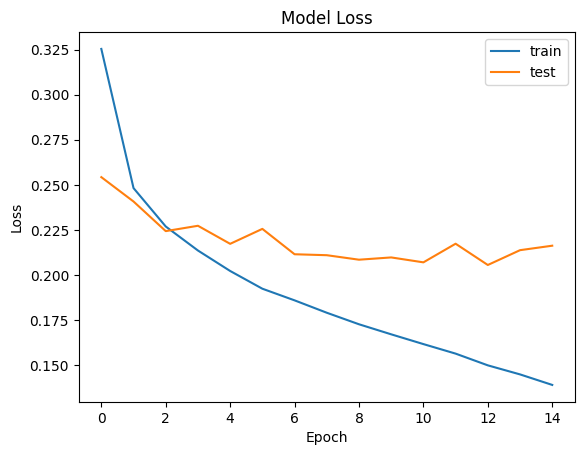

In [ ]:
import matplotlib.pyplot as plt

plt.plot(trace.history['accuracy'])
plt.plot(trace.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='lower right')
plt.show()

plt.plot(trace.history['loss'])
plt.plot(trace.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
y_pred=model.predict(X_test)

2272/2272 [==============================] - 38s 16ms/step


In [ ]:
y_pred[1]

array([7.8803264e-03, 8.8827467e-01, 8.3085679e-04, 1.0301405e-01],
      dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy: {:.2f} %'.format(test_acc*100))

2272/2272 [==============================] - 36s 16ms/step - loss: 0.2163 - accuracy: 0.9312
Test accuracy: 93.12 %


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn import metrics
import seaborn as sns
#category=['Business','Entertainment','Medical','Technology']
category=['b','e','m','t']

def getCategory(arr):
  return(category[np.argmax(arr)])

def display_cm(y_test,y_pred,category):
  #Create arrays of test and predicted values
  yt = np.array([getCategory(row) for row in y_test])
  yp = np.array([getCategory(row) for row in y_pred])
  # Compute confusion matrix
  cm = metrics.confusion_matrix(yt, yp)
  # Express as a dataframe
  cm_df = pd.DataFrame(cm, index = category, columns = category)
  #Plot the confusion matrix
  plt.figure(figsize=(5,4))
  sns.heatmap(cm_df, annot=True,fmt="d")
  plt.title('Confusion Matrix')

  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  plt.show()
  #Calculate category wise TP, FN, FP and TN and add as dataframe columns
  TP = []
  FN = []
  FP = []
  TN = []
  for i in category:
    fn = 0
    fp = 0
    tn = 0
    for j in category:
      if (i==j):
        TP.append(cm_df.loc[i][j])
      else:
        fn += cm_df.loc[i][j]
        fp += cm_df.loc[j][i]
        for k in category:
          if (k!=i):
            tn += cm_df.loc[j][k]
    FN.append(fn)
    FP.append(fp)
    TN.append(tn)

  cm_df['TP'] = TP
  cm_df['FN'] = FN
  cm_df['FP'] = FP
  cm_df['TN'] = TN

  print(cm_df,"\n")
  # Print the precision and recall, among other metrics
  print("\n",metrics.classification_report(yt, yp, digits=3))

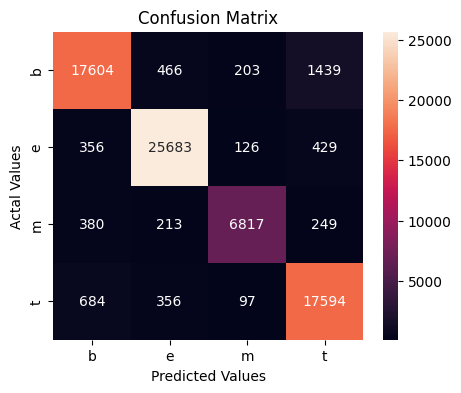

       b      e     m      t     TP    FN    FP     TN
b  17604    466   203   1439  17604  2108  1420  51564
e    356  25683   126    429  25683   911  1035  45067
m    380    213  6817    249   6817   842   426  64611
t    684    356    97  17594  17594  1137  2117  51848 


               precision    recall  f1-score   support

           b      0.925     0.893     0.909     19712
           e      0.961     0.966     0.963     26594
           m      0.941     0.890     0.915      7659
           t      0.893     0.939     0.915     18731

    accuracy                          0.931     72696
   macro avg      0.930     0.922     0.926     72696
weighted avg      0.932     0.931     0.931     72696



In [ ]:
display_cm(y_test,y_pred,category)

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from itertools import cycle


In [ ]:
model = OneVsRestClassifier(trace)
prob_test_vec = y_pred

n_classes = len(category)
fpr = [0] * n_classes
tpr = [0] * n_classes
thresholds = [0] * n_classes
auc_score = [0] * n_classes

for i in range(n_classes):
	fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i],
											prob_test_vec[:, i])
	auc_score[i] = auc(fpr[i], tpr[i])

print("AUC score: ",auc_score)
print("Average AUC score: ", sum(auc_score) / n_classes)



AUC score:  [0.9869772858790623, 0.995182534878804, 0.9928099150277697, 0.9887266369202425]
Average AUC score:  0.9909240931764697


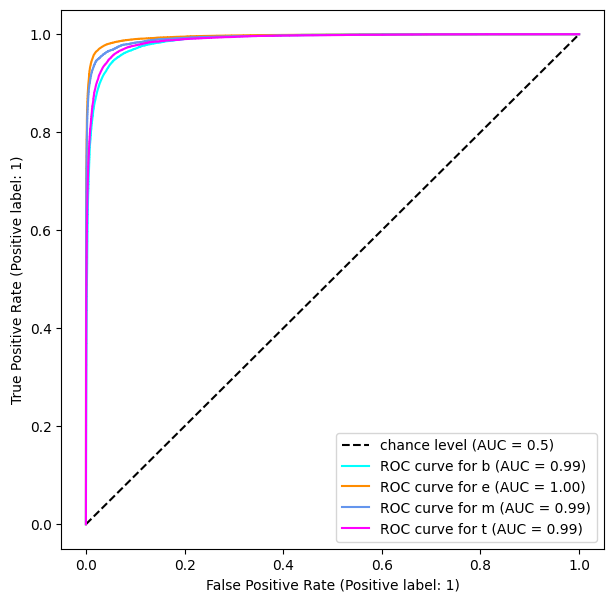

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
target_names = category
colors = cycle(["aqua", "darkorange", "cornflowerblue","magenta"])
for class_id, color in zip(range(n_classes), colors):
	RocCurveDisplay.from_predictions(
		y_test[:, class_id],
		prob_test_vec[:, class_id],
		name=f"ROC curve for {target_names[class_id]}",
		color=color,
		ax=ax,
	)


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test.ravel(), y_pred.ravel()
)
average_precision["micro"] = average_precision_score(y_test, y_pred, average="micro")

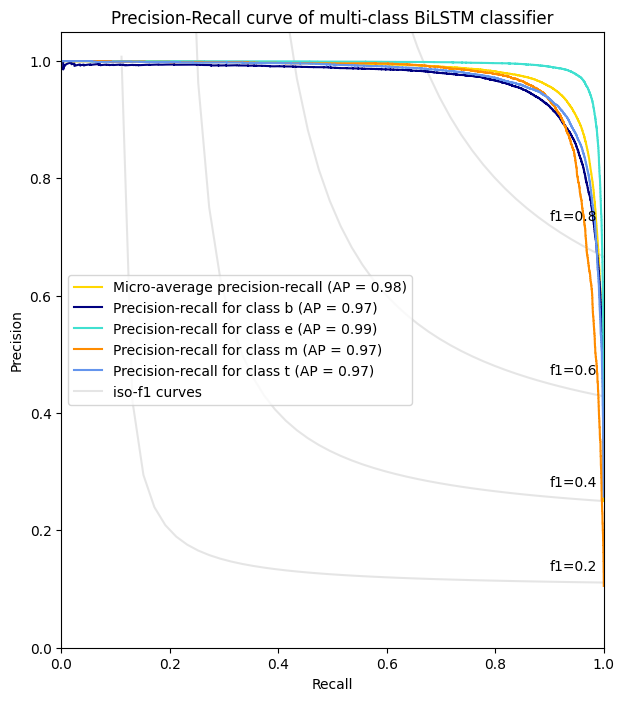

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {target_names[i]}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision-Recall curve of multi-class BiLSTM classifier")

plt.show()

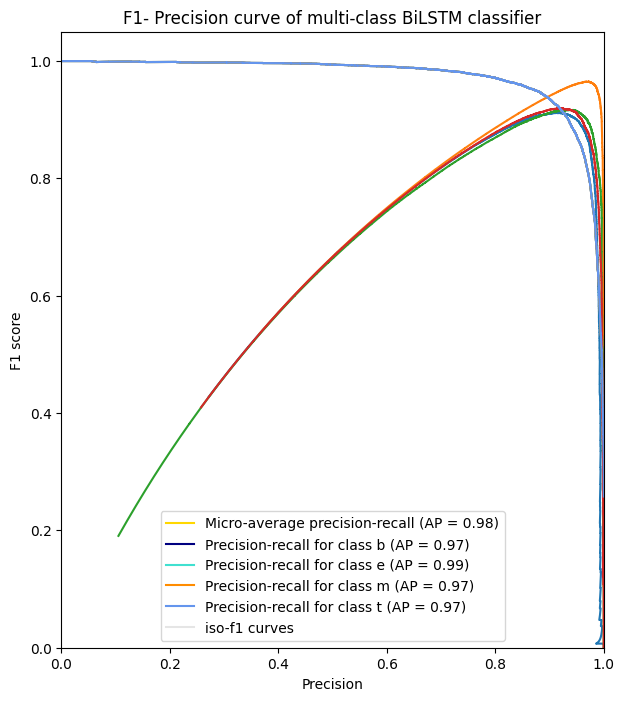

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

for i, color in zip(range(n_classes), colors):
    plt.plot(precision[i],2*(precision[i]*recall[i])/(precision[i]+recall[i]))
    display.plot(ax=ax, name=f"F1-precison for class {target_names[i]}", color=color)

# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
plt.xlabel('Precision')
plt.ylabel('F1 score')
ax.legend(handles=handles, labels=labels, loc="lower center")
ax.set_title("F1- Precision curve of multi-class BiLSTM classifier")

plt.show()